# CSE2530 Computational Intelligence
## Assignment 3: Reinforcement Learning

<div style="background-color:#f1be3e">

_Fill in your group number **from Brightspace**, names, and student numbers._
    
| Group                   | 65      |
|-------------------------|---------|
| Daniel De Dios          | 5722055 |
| Ignacio Cuñado Barral   | 5716128 |
| Pablo Hendriks Bardaj   | 5790069 |
| Alberto Moreno Sanchez  | 5688078 |

#### Imports

In [6]:
"""
You may only use numpy to implement your algorithms
You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.
Put all of your imports in this code block.
"""
import matplotlib.pyplot as plt
import numpy as np
import random
from typing import Dict, List
from tqdm import tqdm

"""
The following classes are fully implemented in their own files and you should not change them.
Nonetheless, we encourage you to check how they work; this will help you get started.
"""
from Agent import Agent
from Maze import Maze
from QTable import QTable
from State import State
from Action import Action

## 2. Navigating in the Supermarket
### 2.1 Development
#### Question 1

In [16]:
class ExplorationStrategy:
    def __init__(self, q_table: QTable):
        self.q_table = q_table

    def random(self, agent: Agent, maze: Maze):
        """
        The random exploration strategy selects a random action uniformly at random
        from the set of all valid actions.
        """
        valid_actions = agent.get_valid_actions(maze)
        selected_action = random.choice(valid_actions)

        return selected_action

    def e_greedy(self, agent: Agent, maze: Maze, eps: float):
        """
        The e-greedy exploration strategy selects a random action with probability eps,
        and the action with highest q-value with probability 1 - eps. A value of epsilon
        close to 0 favours exploitation, while a value close to 1 favours exploration.
        """
        if random.uniform(0, 1) < eps:
            # Explore
            valid_actions = agent.get_valid_actions(maze)
            selected_action = random.choice(valid_actions)
        else:
            # Exploit
            valid_actions = agent.get_valid_actions(maze)
            valid_actions_ids = [action.id for action in valid_actions]
            
            current_state = agent.get_state(maze)
            q_values = {action_id: self.q_table.q_table[current_state.id][action_id] for action_id in valid_actions_ids}
            
            max_q = max(q_values.values())
            best_actions = [action_id for action_id, q in q_values.items() if q == max_q]
            selected_action_id = random.choice(best_actions)
            selected_action = [action for action in valid_actions if action.id == selected_action_id][0]
    
        return selected_action


    def boltzmann(self, agent: Agent, maze: Maze, temperature: float):
        """
        The Boltzmann exploration strategy assigns a probability to each action based on its estimated q-values.
        A large value of the temperature encourages exploration, and as the temperature declines over time,
        exploitation is favoured. 
        """
        valid_actions = agent.get_valid_actions(maze)
        valid_actions_ids = [action.id for action in valid_actions]
        
        current_state = agent.get_state(maze)
        q_values = {action_id: self.q_table.q_table[current_state.id][action_id] for action_id in valid_actions_ids}
        
        probabilities = np.array([np.exp(q / temperature) for q in q_values.values()])
        probabilities /= probabilities.sum()
        
        selected_action_id = np.random.choice(list(q_values.keys()), p=probabilities)
        selected_action = [action for action in valid_actions if action.id == selected_action_id][0]
    
        return selected_action


<div style="background-color:#f1be3e">

_Put your extra code blocks above (if any) and write your answer here._

#### Question 2

100%|██████████| 300/300 [00:14<00:00, 21.32it/s]


Text(0.5, 1.0, 'Total Reward per Episode')

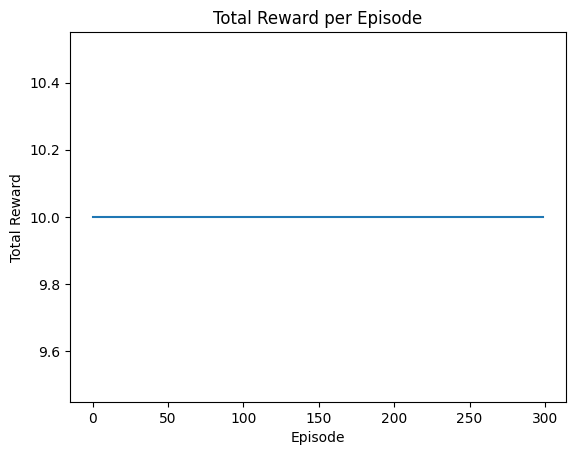

In [20]:
# Create a Maze instance.
maze = Maze("./../data/toy_maze.txt")
maze.set_reward(x=9, y=9, reward=10)
maze.set_terminal(x=9, y=9)
# Create an Agent.
agent = Agent(start_x=0, start_y=0)
# Create a QTable.
states = maze.get_all_states()
actions = [Action(id) for id in ["up", "down", "left", "right"]]
q_table = QTable(states, actions)
# Create an ExplorationStrategy.
exploration_strategy = ExplorationStrategy(q_table)
# Create a learner.
params = {"lr": 0.7, "gamma": 0.9}
# learner = QLearning(q_table, params)

# Hyper-parameters.
n_episodes = 300
episode_lengths = []
episode_rewards = []

for episode in tqdm(range(n_episodes)):
    total_reward = 0
    agent.reset()  
    done = False
    steps = 0
    
    while not done:
        current_state = agent.get_state(maze)
        action = exploration_strategy.boltzmann(agent, maze, 0.2)
        next_state, reward, done = agent.step(action, maze)
        
        # Update the total reward
        total_reward += reward
        steps += 1
        
    episode_rewards.append(total_reward)
    episode_lengths.append(steps)
    
# Plot the results
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")

<div style="background-color:#f1be3e">

_Put your extra code blocks above (if any) and write your answer here._

#### Question 3

<div style="background-color:#f1be3e">

_Put your extra code blocks above (if any) and write your answer here._  
_You may want to directly modify the cycle in Question 2._

#### Question 4

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 5

In [ ]:
class QLearning:

    def __init__(self, q_table: QTable, params: Dict[str, float]) -> None:
        self.q_table = q_table
        self.params = params

    def learn(self, possible_actions: List[Action], state: State, action: Action,
               next_state: State, reward: int, done: bool) -> None:
        pass

In [ ]:
class SARSA:

    def __init__(self, q_table: QTable, params: Dict[str, float]) -> None:
        self.q_table = q_table
        self.params = params
    
    def learn(self, state: State, action: Action, next_state: State, next_action: Action,
               reward: float, done: bool) -> None:
        pass

<div style="background-color:#f1be3e">

_Put your extra code blocks above (if any) and write your answer here._

#### Question 6

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 7

<div style="background-color:#f1be3e">

_Write your answer here._

### 2.2 Optimization
#### Question 8

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 9

<div style="background-color:#f1be3e">

_Write your answer here._

#### Question 10

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 11

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 12

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 2.3 Introducing More Rewards
#### Question 13

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 14

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 15

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 16

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

## 3. Open Questions
### 3.1 Reflection
#### Question 17

<div style="background-color:#f1be3e">

_Write your answer here._

#### Question 18

<div style="background-color:#f1be3e">

_Write your answer here._

#### Question 19

<div style="background-color:#f1be3e">

_Write your answer here._

### 3.2 Pen and Paper
#### Question 20

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

#### Question 21

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

#### Question 22

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

### 3.3 Division of Work

#### Question 23

<div style="background-color:#f1be3e">


|          Component          |  Name A   |  Name B   |  Name C   |  Name D   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     A     |     B     |     C     |     D     |
| Code (implementation)       |     A     |     B     |     C     |     D     |
| Code (validation)           |     A     |     B     |     C     |     D     |
| Experiments (execution)     |     A     |     B     |     C     |     D     |
| Experiments (analysis)      |     A     |     B     |     C     |     D     |
| Experiments (visualization) |     A     |     B     |     C     |     D     |
| Report (original draft)     |     A     |     B     |     C     |     D     |
| Report (reviewing, editing) |     A     |     B     |     C     |     D     |

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**